In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette=sns.color_palette()

In [3]:
pd.options.display.min_rows = 20
pd.options.display.max_columns = 50

### Load in the data

In [5]:
## Read in 2022 data from filesystem
df_flights = pd.read_csv("../../data/eda/flights/flight_data_Y2022/flight_data_2022.csv.zip",  low_memory=False)

In [6]:
airlines = pd.read_csv("../../data/databases/flight_attributes/airlines.csv.zip", low_memory=False)
airline_mapper = airlines.set_index("Code")["Description"]

### Clean the data

In [7]:

SELECTED_COLUMNS = [
    "FlightDate",
    "Operating_Airline ",
    "Tail_Number",
    "Flight_Number_Operating_Airline",
    "OriginAirportID",
    "Origin",
    "OriginCityName",
    "OriginState",
    "DestAirportID",
    "Dest",
    "DestCityName",
    "DestState",
    "DestStateName",
    "CRSDepTime",
    "DepTime",
    "DepDelay",
    "DepDelayMinutes",
    "DepDel15",
    "DepartureDelayGroups",
    "DepTimeBlk",
    "TaxiOut",
    "WheelsOff",
    "WheelsOn",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelay",
    "ArrDelayMinutes",
    "ArrDel15",
    "ArrivalDelayGroups",
    "ArrTimeBlk",
    "Cancelled",
    "CancellationCode",
    "Diverted",
    "CRSElapsedTime",
    "ActualElapsedTime",
    "AirTime",
    "Flights",
    "Distance",
    "DistanceGroup",
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay",
    "FirstDepTime",
    "TotalAddGTime",
    "LongestAddGTime",
]


In [8]:
def airline_mapping(df_flights):
    df_flights["Operating_Airline"] = df_flights["Operating_Airline"].map(airline_mapper)
    return df_flights

def tweak_df_flights(df_flights):
    df_flights = (
        df_flights[SELECTED_COLUMNS]
        .copy()
        .rename(columns={"Operating_Airline ": "Operating_Airline"})
    )
    df_flights.pipe(airline_mapping)
    return df_flights.assign(
        DepTime=df_flights.DepTime.fillna(0).astype("float16"),
        DepDelay=df_flights.DepDelay.fillna(0).astype("float16"),
        DepDelayMinutes=df_flights.DepDelayMinutes.fillna(0).astype("float16"),
        DepDel15=df_flights.DepDel15.fillna(0).astype("float16"),
        DepartureDelayGroups=df_flights.DepartureDelayGroups.fillna(0).astype("float16"),
        TaxiOut=df_flights.TaxiOut.fillna(0).astype("float16"),
        WheelsOff=df_flights.WheelsOff.fillna(0).astype("float16"),
        WheelsOn=df_flights.WheelsOn.fillna(0).astype("float16"),
        TaxiIn=df_flights.TaxiIn.fillna(0).astype("float16"),
        ArrTime=df_flights.ArrTime.fillna(0).astype("float16"),
        ArrDelay=df_flights.ArrDelay.fillna(0).astype("float16"),
        ArrDelayMinutes=df_flights.ArrDelayMinutes.fillna(0).astype("float16"),
        ArrDel15=df_flights.ArrDel15.fillna(0).astype("float16"),
        ArrivalDelayGroups=df_flights.ArrivalDelayGroups.fillna(0).astype("float16"),
        CRSElapsedTime=df_flights.CRSElapsedTime.fillna(0).astype("float16"),
        ActualElapsedTime=df_flights.ActualElapsedTime.fillna(0).astype("float16"),
        AirTime=df_flights.AirTime.fillna(0).astype("float16"),
        Flights=df_flights.Flights.fillna(0).astype("float16"),
        Distance=df_flights.Distance.fillna(0).astype("float16"),
        CarrierDelay=df_flights.CarrierDelay.fillna(0).astype("float16"),
        WeatherDelay=df_flights.WeatherDelay.fillna(0).astype("float16"),
        NASDelay=df_flights.NASDelay.fillna(0).astype("float16"),
        SecurityDelay=df_flights.SecurityDelay.fillna(0).astype("float16"),
        LateAircraftDelay=df_flights.LateAircraftDelay.fillna(0).astype("float16"),
        FirstDepTime=df_flights.FirstDepTime.fillna(0).astype("float16"),
        TotalAddGTime=df_flights.TotalAddGTime.fillna(0).astype("float16"),
        LongestAddGTime=df_flights.LongestAddGTime.fillna(0).astype("float16"),
        CancellationCode=df_flights.CancellationCode.fillna("none").astype("category"),
        Tail_Number=df_flights.Tail_Number.fillna("none").astype("category"),
        FlightDate=pd.to_datetime(df_flights.FlightDate),
    ).astype(
        {
            "Operating_Airline": "category",
            "Origin": "category",
            "Dest": "category",
            "DestState": "category",
            "OriginState": "category",
            "OriginCityName": "category",
            "DestStateName": "category",
            "DestCityName": "category",
            "DepTimeBlk": "category",
            "ArrTimeBlk": "category",
            "Cancelled": "bool",
            "Diverted": "bool",
            "OriginAirportID": "int16",
            "DestAirportID": "int16",
            "CRSDepTime": "int16",
            "CRSArrTime": "int16",
            "DistanceGroup": "int16",
            "Flight_Number_Operating_Airline": "int16"
        }
    )


df_flights = tweak_df_flights(df_flights)
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 48 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Operating_Airline                category      
 2   Tail_Number                      category      
 3   Flight_Number_Operating_Airline  int16         
 4   OriginAirportID                  int16         
 5   Origin                           category      
 6   OriginCityName                   category      
 7   OriginState                      category      
 8   DestAirportID                    int16         
 9   Dest                             category      
 10  DestCityName                     category      
 11  DestState                        category      
 12  DestStateName                    category      
 13  CRSDepTime                       int16         
 14  DepTime                          f

In [9]:
df_flights.shape

(4691967, 48)

## Statistical Analysis

#### Correlation matrix

In [13]:
df_flights.head()

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,0.0,1419,0.0,0.0,0.0,0.0,0.0,1400-1459,True,A,False,173.0,0.0,0.0,1.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,none,False,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,none,False,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,none,False,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,N978AT,1584,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,none,False,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
corr = df_flights.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\jenni\AppData\Local\Temp\ipykernel_6004\974634419.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_flights.corr()
c:\Users\jenni\.virtualenvs\team-3-N2NXnkel\Lib\site-packages\pandas\io\formats\style.py:3925: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\jenni\.virtualenvs\team-3-N2NXnkel\Lib\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Flight_Number_Operating_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
Flight_Number_Operating_Airline,1.000000,-0.029752,-0.051147,-0.008390,-0.013974,-0.023114,-0.014172,-0.064117,-0.045148,0.107474,-0.004359,0.002162,0.003059,0.003753,0.007769,-0.016408,-0.006792,-0.044786,-0.031448,0.021339,0.002046,-0.345504,-0.324626,-0.353821,nan,-0.384888,-0.382906,0.002054,0.017904,-0.015548,-0.005429,-0.012652,-0.004957,0.002642,0.002655
OriginAirportID,-0.029752,1.000000,0.006255,-0.033518,-0.023255,-0.014652,-0.012533,-0.024971,-0.022238,-0.022734,-0.025445,0.001463,0.023309,-0.012546,0.002188,-0.013824,-0.011281,-0.020414,-0.020656,-0.016677,0.001069,0.058035,0.058901,0.062429,nan,0.077437,0.081815,-0.010012,-0.006476,-0.006439,-0.002676,-0.001127,-0.005843,-0.005192,-0.005215
DestAirportID,-0.051147,0.006255,1.000000,0.026225,0.030871,-0.005019,-0.005361,0.002974,-0.003520,0.007419,0.031537,0.022117,-0.067575,0.018446,0.020829,-0.006883,-0.007207,-0.001511,-0.005993,-0.017180,-0.004331,0.084754,0.082794,0.091661,nan,0.077435,0.081798,-0.001711,-0.003735,-0.008197,-0.000770,-0.005707,-0.001244,-0.003102,-0.003017
CRSDepTime,-0.008390,-0.033518,0.026225,1.000000,0.840358,0.102098,0.095622,0.184722,0.150085,-0.000222,0.808513,0.527795,-0.024429,0.684229,0.497831,0.102342,0.086206,0.159425,0.140376,0.021249,0.002088,-0.013054,-0.015225,-0.013542,nan,-0.003069,-0.004178,0.024075,0.016375,0.032415,0.002292,0.101512,0.026185,0.004757,0.004882
DepTime,-0.013974,-0.023255,0.030871,0.840358,1.000000,0.133076,0.129948,0.250080,0.191388,0.131614,0.969472,0.693240,0.063722,0.610980,0.663341,0.126421,0.120610,0.222469,0.172232,-0.401344,0.007677,-0.013604,0.110510,0.091511,nan,-0.004102,-0.005162,0.039401,0.021194,0.057190,0.004569,0.127657,0.040475,0.024034,0.024079
DepDelay,-0.023114,-0.014652,-0.005019,0.102098,0.133076,1.000000,0.997910,0.548335,0.821624,0.051616,0.122346,0.036071,0.017112,0.078059,0.029398,0.964055,0.972308,0.508926,0.770756,-0.037164,0.015281,0.022724,0.035210,0.028413,nan,0.021589,0.022013,0.731257,0.275693,0.242059,0.038098,0.591870,0.194756,0.195455,0.193704
DepDelayMinutes,-0.014172,-0.012533,-0.005361,0.095622,0.129948,0.997910,1.000000,0.530038,0.807738,0.054493,0.119551,0.035403,0.022915,0.072730,0.029179,0.961990,0.975506,0.494021,0.758582,-0.047299,0.014887,0.018152,0.034029,0.026230,nan,0.016364,0.016780,0.736442,0.277687,0.240199,0.037885,0.592094,0.194445,0.196090,0.194277
DepDel15,-0.064117,-0.024971,0.002974,0.184722,0.250080,0.548335,0.530038,1.000000,0.749702,0.061194,0.239661,0.123818,0.007356,0.138327,0.112351,0.531001,0.485089,0.747034,0.683952,-0.085144,0.017646,0.029611,0.056191,0.049983,nan,0.033488,0.034267,0.289182,0.108302,0.169526,0.030617,0.375331,0.131456,0.102410,0.103359
DepartureDelayGroups,-0.045148,-0.022238,-0.003520,0.150085,0.191388,0.821624,0.807738,0.749702,1.000000,0.052532,0.176179,0.051593,0.009093,0.115399,0.041560,0.795042,0.772539,0.679143,0.921125,-0.010589,0.019398,0.031511,0.036633,0.030629,nan,0.031070,0.031855,0.478633,0.198134,0.238486,0.035971,0.591963,0.203157,0.189236,0.189724
TaxiOut,0.107474,-0.022734,0.007419,-0.000222,0.131614,0.051616,0.054493,0.061194,0.052532,1.000000,0.157956,0.152091,0.073699,0.022412,0.148759,0.176186,0.154931,0.244984,0.226467,-0.291710,0.015463,0.076168,0.254566,0.122944,nan,0.037387,0.036063,0.045944,0.054930,0.293551,0.002973,0.035166,0.018473,0.019728,0.020374


C:\Users\jenni\AppData\Local\Temp\ipykernel_6004\2901541064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_flights.corr())


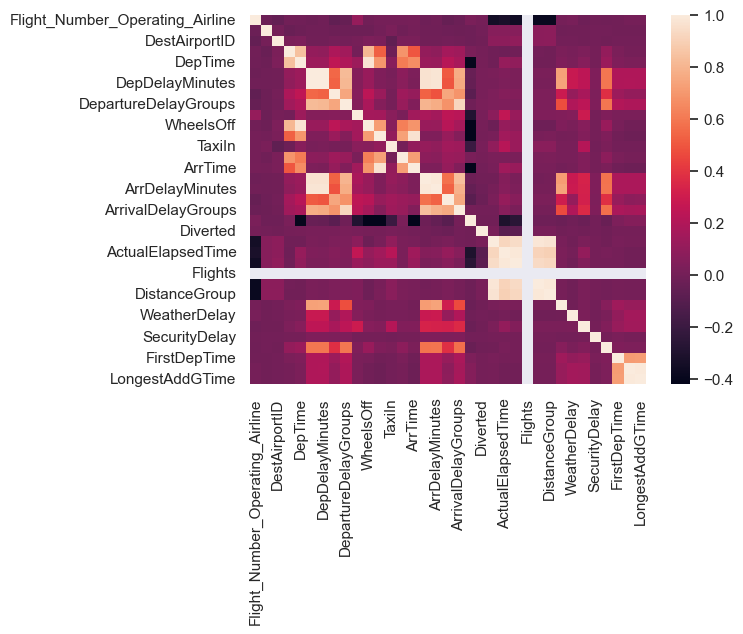

In [15]:
sns.heatmap(df_flights.corr())
plt.show()

<AxesSubplot: xlabel='FlightDate'>

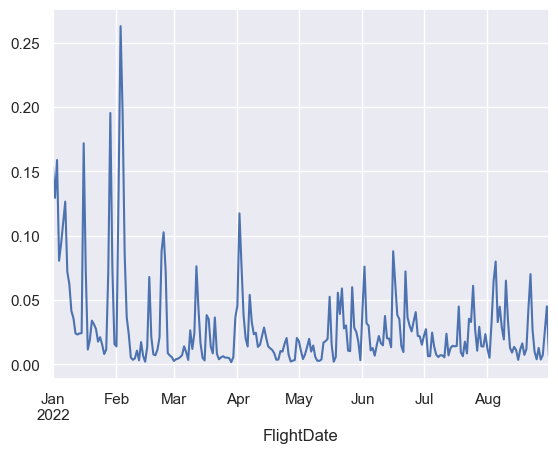

In [16]:
(df_flights.
 groupby("FlightDate")
 ["Cancelled"]
 .agg("mean")
 .plot()
 )


<AxesSubplot: xlabel='FlightDate'>

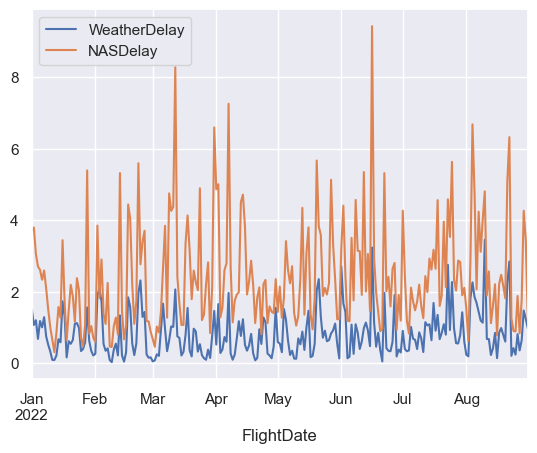

In [17]:
(df_flights.
 groupby("FlightDate")
[["WeatherDelay", "NASDelay"]]
 .agg("mean")
 .plot())

<AxesSubplot: xlabel='FlightDate'>

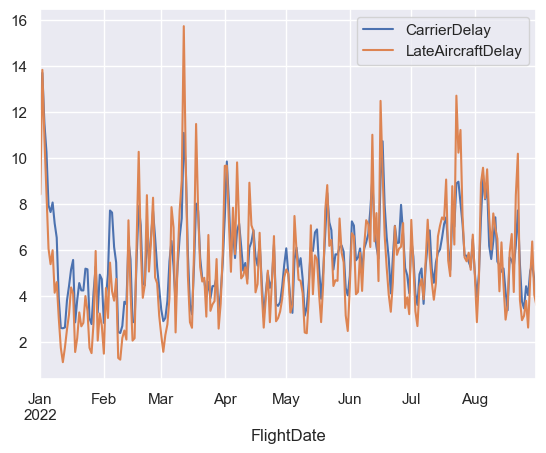

In [18]:
(df_flights.
 groupby("FlightDate")
 [["CarrierDelay","LateAircraftDelay"]]
 .agg("mean")
 .plot())